In [1]:
!wget https://raw.githubusercontent.com/romeokienzler/uhack/master/projects/bsusat/telemetry3.json

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190416083213-0000
KERNEL_ID = 02187022-c342-4d76-af8b-a0151123e674
--2019-04-16 08:32:16--  https://raw.githubusercontent.com/romeokienzler/uhack/master/projects/bsusat/telemetry3.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454538 (444K) [text/plain]
Saving to: 'telemetry3.json'

telemetry3.json     100%[===================>] 443.88K  --.-KB/s    in 0.02s   

2019-04-16 08:32:16 (23.8 MB/s) - 'telemetry3.json' saved [454538/454538]



In [2]:
df_data_1 = spark.read.json('telemetry3.json')
df_data_1.take(5)

[Row(EPS_can_status='OK', MCUSR='5', OBC_can_status='TIMEOUT', RF_ID='0', battery_voltage='8.35', data_type='3', info_size='43', modem_on_period='10', observer='JA0CAW', opr_time='336', pamp_temp='34.26', pamp_voltage='2.2', pwr_save_state='on', reboot_cnt='48', seq_number='1', system_voltage='8.72', timestamp='2018-11-13T10:49:18.900Z', tx_attenuator='8'),
 Row(EPS_can_status='OK', MCUSR='5', OBC_can_status='TIMEOUT', RF_ID='0', battery_voltage='8.35', data_type='3', info_size='43', modem_on_period='10', observer='JesperLF', opr_time='565', pamp_temp='32.75', pamp_voltage='2.2', pwr_save_state='on', reboot_cnt='46', seq_number='1', system_voltage='8.72', timestamp='2018-11-13T09:33:07.680Z', tx_attenuator='8'),
 Row(EPS_can_status='OK', MCUSR='5', OBC_can_status='TIMEOUT', RF_ID='0', battery_voltage='8.35', data_type='3', info_size='43', modem_on_period='10', observer='JesperLF', opr_time='475', pamp_temp='32.75', pamp_voltage='2.2', pwr_save_state='on', reboot_cnt='46', seq_number='1

In [3]:
df_data_1.count()

1155

In [4]:
df = df_data_1

In [5]:
df.createOrReplaceTempView('df')

In [6]:
spark.sql('select * from df').show()

+--------------+-----+--------------+-----+---------------+---------+---------+---------------+--------+--------+---------+------------+--------------+----------+----------+--------------+--------------------+-------------+
|EPS_can_status|MCUSR|OBC_can_status|RF_ID|battery_voltage|data_type|info_size|modem_on_period|observer|opr_time|pamp_temp|pamp_voltage|pwr_save_state|reboot_cnt|seq_number|system_voltage|           timestamp|tx_attenuator|
+--------------+-----+--------------+-----+---------------+---------+---------+---------------+--------+--------+---------+------------+--------------+----------+----------+--------------+--------------------+-------------+
|            OK|    5|       TIMEOUT|    0|           8.35|        3|       43|             10|  JA0CAW|     336|    34.26|         2.2|            on|        48|         1|          8.72|2018-11-13T10:49:...|            8|
|            OK|    5|       TIMEOUT|    0|           8.35|        3|       43|             10|JesperLF|

In [7]:
df.printSchema()

root
 |-- EPS_can_status: string (nullable = true)
 |-- MCUSR: string (nullable = true)
 |-- OBC_can_status: string (nullable = true)
 |-- RF_ID: string (nullable = true)
 |-- battery_voltage: string (nullable = true)
 |-- data_type: string (nullable = true)
 |-- info_size: string (nullable = true)
 |-- modem_on_period: string (nullable = true)
 |-- observer: string (nullable = true)
 |-- opr_time: string (nullable = true)
 |-- pamp_temp: string (nullable = true)
 |-- pamp_voltage: string (nullable = true)
 |-- pwr_save_state: string (nullable = true)
 |-- reboot_cnt: string (nullable = true)
 |-- seq_number: string (nullable = true)
 |-- system_voltage: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- tx_attenuator: string (nullable = true)



In [10]:
df_cast = df.select(
        df.timestamp,
        df.battery_voltage.cast("float"),
        df.pamp_voltage.cast("float"),
        df.system_voltage.cast("float"),
        df.pamp_temp.cast("float")
    )

In [11]:
df_cast.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- battery_voltage: float (nullable = true)
 |-- pamp_voltage: float (nullable = true)
 |-- system_voltage: float (nullable = true)
 |-- pamp_temp: float (nullable = true)



In [12]:
df_cast.show()

+--------------------+---------------+------------+--------------+---------+
|           timestamp|battery_voltage|pamp_voltage|system_voltage|pamp_temp|
+--------------------+---------------+------------+--------------+---------+
|2018-11-13T10:49:...|           8.35|         2.2|          8.72|    34.26|
|2018-11-13T09:33:...|           8.35|         2.2|          8.72|    32.75|
|2018-11-13T09:31:...|           8.35|         2.2|          8.72|    32.75|
|2018-11-13T08:00:...|           8.32|         2.2|          4.98|    34.26|
|2018-11-13T07:59:...|           8.32|         2.2|          4.98|    34.64|
|2018-11-13T07:59:...|           8.35|         2.2|          4.98|    35.02|
|2018-11-13T07:59:...|           8.35|         2.2|          4.98|    34.64|
|2018-11-13T07:59:...|           8.35|         2.2|          4.98|    34.64|
|2018-11-13T07:59:...|           8.35|         2.2|          4.98|    34.64|
|2018-11-13T07:59:...|           8.35|         2.2|          4.98|    34.26|

In [13]:
df_cast.createOrReplaceTempView('df_cast')
spark.sql("SELECT *, unix_timestamp(timestamp, 'yyyy-MM-ddTHH:mm:ss.SSSZ') from df_cast").show()

+--------------------+---------------+------------+--------------+---------+---------------------------------------------------+
|           timestamp|battery_voltage|pamp_voltage|system_voltage|pamp_temp|unix_timestamp(timestamp, yyyy-MM-ddTHH:mm:ss.SSSZ)|
+--------------------+---------------+------------+--------------+---------+---------------------------------------------------+
|2018-11-13T10:49:...|           8.35|         2.2|          8.72|    34.26|                                               null|
|2018-11-13T09:33:...|           8.35|         2.2|          8.72|    32.75|                                               null|
|2018-11-13T09:31:...|           8.35|         2.2|          8.72|    32.75|                                               null|
|2018-11-13T08:00:...|           8.32|         2.2|          4.98|    34.26|                                               null|
|2018-11-13T07:59:...|           8.32|         2.2|          4.98|    34.64|                     

In [14]:
df_cast.withColumn("ts", unix_timestamp("timestamp", "yyyy-MM-dd'T'HH:mm:ss.SSS'Z'").cast(TimestampType))

NameError: name 'unix_timestamp' is not defined

In [15]:
from pyspark.sql.functions import from_unixtime
from pyspark.sql.types import DateType
df_cast_ts = df_cast.withColumn('ts', from_unixtime('timestamp').cast(DateType()))

In [16]:
df_cast_ts_ordered = df_cast_ts.orderBy('timestamp')


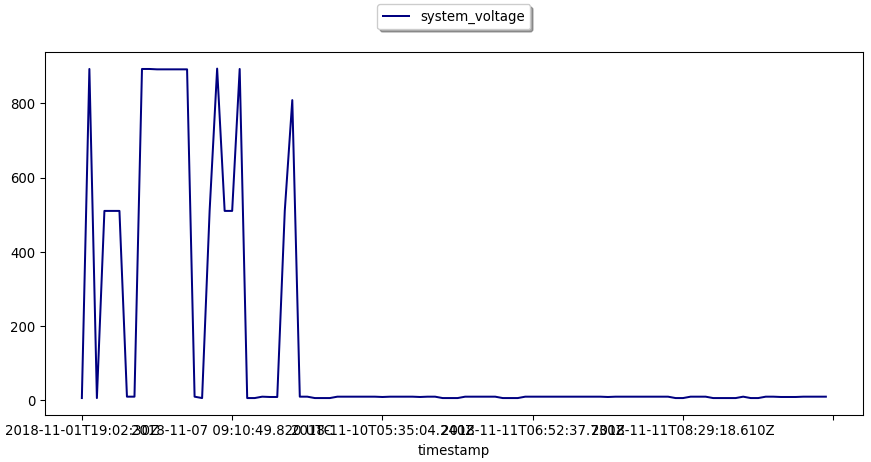

In [17]:
import pixiedust
display(df_cast_ts_ordered)

In [18]:
df_cast_ts_ordered.show()

+--------------------+---------------+------------+--------------+---------+----+
|           timestamp|battery_voltage|pamp_voltage|system_voltage|pamp_temp|  ts|
+--------------------+---------------+------------+--------------+---------+----+
|                    |           8.35|         2.2|         510.0|     35.4|null|
|                    |           8.35|         2.2|         510.0|    34.64|null|
|                    |       8.342743|         2.2|         510.0|35.017563|null|
|                    |           8.35|         2.2|         510.0|    35.02|null|
|                    |           8.35|         2.2|         510.0|    35.02|null|
|                    |       8.345032|         2.2|         510.0|35.017563|null|
|                    |           8.35|         2.2|         510.0|    35.02|null|
|                    |           8.34|         2.2|         510.0|    34.64|null|
|                    |           8.35|         2.2|         510.0|   35.018|null|
|2018-10-29 16:1

In [22]:


from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols=["battery_voltage","pamp_voltage","system_voltage","pamp_temp"],
                                  outputCol="features")



In [23]:


from pyspark.ml.clustering import KMeans

kmeans = KMeans().setK(2).setSeed(1)



In [24]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, kmeans])

In [25]:

model = pipeline.fit(df_cast_ts_ordered)



In [26]:
wssse = model.stages[1].computeCost(vectorAssembler.transform(df_cast_ts_ordered))
print("Within Set Sum of Squared Errors = " + str(wssse))

Within Set Sum of Squared Errors = 5822416.880138148


In [27]:
type(model.stages[1])

pyspark.ml.clustering.KMeansModel

In [28]:
transformed =  model.transform(df_cast_ts_ordered)
transformed.select('prediction').distinct().show()

+----------+
|prediction|
+----------+
|         1|
|         0|
+----------+



In [29]:
transformed.createOrReplaceTempView('transformed')

In [30]:
spark.sql('select avg(system_voltage) from transformed where prediction = 0').show()

+-------------------+
|avg(system_voltage)|
+-------------------+
| 7.4811055684428185|
+-------------------+



In [31]:
spark.sql('select count(system_voltage) from transformed where prediction = 1 and system_voltage >100').show()

+---------------------+
|count(system_voltage)|
+---------------------+
|                  169|
+---------------------+



In [29]:
spark.sql('select count(system_voltage) from transformed where prediction = 1').show()

+---------------------+
|count(system_voltage)|
+---------------------+
|                  169|
+---------------------+

